In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('ml-latest-small/ratings.csv', sep=',')

print(len(data))
data.head()

100004


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [2]:
user = data['userId'].values
rating = data['rating'].values
movie = data['movieId'].values
#movie=list(set(movie))
print(len(movie))

100004


In [3]:
allmovie=list(set(movie))
print(len(allmovie))

9066


In [4]:
r2=list(set(rating))
print(r2)

[0.5, 1.0, 2.0, 3.5, 2.5, 3.0, 4.0, 5.0, 4.5, 1.5]


In [5]:
print(np.max(user))
print(np.max(movie))

671
163949


In [6]:
def build_R(user, movie, rating):
    R = np.zeros((671,163949),dtype=int)
    for i in range(len(user)):
        R[user[i]-1, movie[i]-1] = rating[i]
    return R

In [7]:
R = build_R(user, movie, rating)
print(R.shape)

(671, 163949)


# Q1: Calculate Sparsity

In [8]:
W = (R!=0)
W[W == True] = 1
W[W == False] = 0
print(np.sum(W))
print('sparsity = ', np.sum(W)/(671*9066))
# To be consistent with our Q matrix
#W = W.astype(np.float64, copy=False)

98903
sparsity =  0.016258153899060476


# Q2: Plot a histogram showing the frequency of the rating values.

In [72]:
r0=0
r1=0
r2=0
r3=0
r4=0
r5=0
r6=0
r7=0
r8=0
r9=0

for r in rating:
    if r==0.5:
        r0+=1
    if r==1:
        r1+=1
    if r==1.5:
        r2+=1
    if r==2:
        r3+=1
    if r==2.5:
        r4+=1
    if r==3:
        r5+=1
    if r==3.5:
        r6+=1
    if r==4:
        r7+=1
    if r==4.5:
        r8+=1
    if r==5:
        r9+=1
        
print(r0,r1,r2,r3,r4,r5,r6,r7,r8,r9)

1101 3326 1687 7271 4449 20064 10538 28750 7723 15095


Text(0.5,1,'Frequency of the rating values')

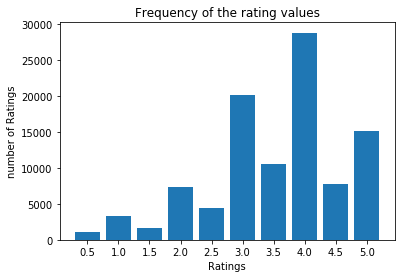

In [73]:
X = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
R_histogram = [r0,r1,r2,r3,r4,r5,r6,r7,r8,r9]

fig = plt.figure()
plt.bar(X,R_histogram,0.4)
plt.xticks([0.5, 1.0, 1.5, 2.0, 3.5, 2.5, 3.0, 4.0, 4.5, 5.0])
plt.xlabel("Ratings")
plt.ylabel("number of Ratings")
plt.title("Frequency of the rating values")

From the figure, we can see that people are tend to give rating among 3.0--5.0, and the rating with the most frequency is 4.0.

# Q3: Plot the distribution of ratings among movies.

In [74]:
allmovie=list(set(movie))
print(len(allmovie))

9066


In [75]:
allmovie.sort()
print(allmovie[0:20])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [76]:
print(len(W[:,163948]))

671


In [77]:
r_nums = []
for movie in allmovie:
    r_num = np.sum(W[:,movie-1])
    r_nums.append(r_num)
print(r_nums[0:20])

[247, 107, 58, 13, 56, 104, 51, 5, 20, 122, 82, 18, 8, 31, 11, 88, 86, 26, 91, 13]


Text(0.5,1,'Distribution of ratings among movies')

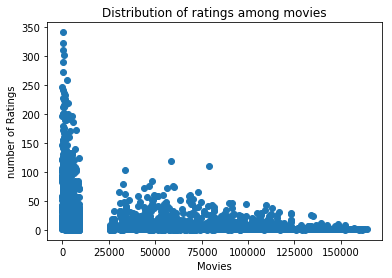

In [79]:
plt.figure()
plt.scatter(allmovie,r_nums)
#plt.xticks([10000,25000,50000,75000,100000,125000,150000])
plt.xlabel("Movies")
plt.ylabel("number of Ratings")
plt.title("Distribution of ratings among movies")

Text(0.5,1,'Distribution of ratings among movies')

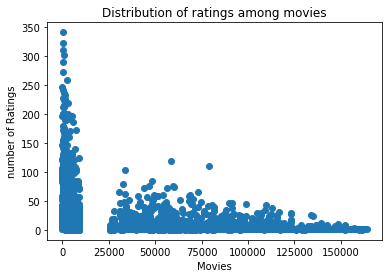

In [81]:
obj=pd.Series(allmovie,index=r_nums)
obj_sorted = obj.sort_index(ascending=False)
allmovie_sorted = obj_sorted.values
r_sorted = obj_sorted.index

plt.figure()
plt.scatter(allmovie_sorted,r_sorted)
#plt.xticks([10000,25000,50000,75000,100000,125000,150000])
plt.xlabel("Movies")
plt.ylabel("number of Ratings")
plt.title("Distribution of ratings among movies")

# Q4: Plot the distribution of ratings among users.

In [82]:
print(np.max(user))

671


In [9]:
allusers=list(set(user))
print(len(allusers))
allusers.sort()

671


Text(0.5,1,'Distribution of ratings among users')

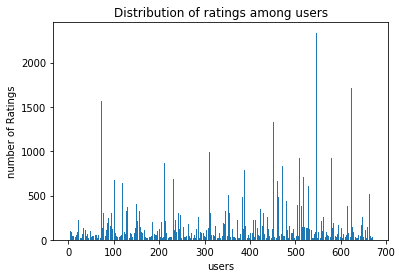

In [10]:
r_nums = []
for u in allusers:
    r_num = np.sum(W[u-1,:])
    r_nums.append(r_num)

plt.figure()
plt.bar(allusers,r_nums)
plt.xlabel("users")
plt.ylabel("number of Ratings")
plt.title("Distribution of ratings among users")

# Q5: Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

Most ratings of movies are among index 0 to 10000.

# Q6: Plot the distribution of movie numbers among rating variance

In [85]:
r_var = []
for movie in allmovie:
    var = np.var(R[:,movie-1])
    r_var.append(var)

In [86]:
print(np.max(r_var))
print(np.min(r_var))  

5.092148427175668
0.0


In [87]:
v0=0
v1=0
v2=0
v3=0
v4=0
v5=0
v6=0
v7=0
v8=0
v9=0
v10=0

for var in r_var:
    if var <= 0.5:
        v0+=1
    if var > 0.5 and var <=1.0:
        v1+=1
    if var > 1.0 and var <=1.5:
        v2+=1
    if var > 1.5 and var <=2.0:
        v3+=1
    if var > 2.0 and var <=2.5:
        v4+=1
    if var > 2.5 and var <=3.0:
        v5+=1
    if var > 3.0 and var <=3.5:
        v6+=1
    if var > 3.5 and var <=4.0:
        v7+=1
    if var > 4.0 and var <=4.5:
        v8+=1
    if var > 4.5 and var <=5.0:
        v9+=1
    if var > 5.0:
        v10+=1
varnums = [v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10]
print(varnums)

[8149, 550, 153, 104, 48, 26, 15, 9, 9, 2, 1]


Text(0.5,1,'number of movies--Rating variance')

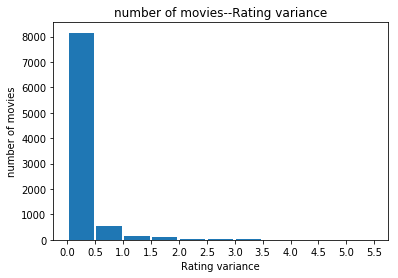

In [88]:
#X = np.arange(11)+1

plt.figure()

#plt.bar(X-0.25,[v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10],0.4)
plt.bar([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25],[v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10],0.45)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 3.5, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5])

plt.xlabel("Rating variance")
plt.ylabel("number of movies")
plt.title("number of movies--Rating variance")

From the figure, the variance of most movies is among 0--0.5, which means that the rating of a movie is stable.